# Task 1

- What is Sentence tokenization?

   Sentence tokenization is the process of splitting up a paragraph or large text (book or document) into individual sentences.
   Some common approaches are:
   - a) Rule-based: Using a set of pre-defined rules (like certain punctuation marks) to identify the ends of sentences.
   - b) Machine-learning based: Training an ML model to predict the end of the sentence. This would require annotated data and training a sequence labeling model.


- Word tokenization?
  
  It is the process of splitting a sentence into individual tokens or words. In english, different words are separated by a space therefore making it a straightforward task. However, depending on the language this can be a challenging task.
  Like sentence tokenization this too can be done in a rule-based manner or using machine learning methods trained to identify language specific patterns.


- Part-of-Speech (POS) Tagging?

  It is the process of tagging each word in a sentence with it's grammatical type of part-of-speech (Noun, Pronoun, Conjunction, Adjective, Verb etc.). This can be identified based on the context or the role of the word in the sentence.
  This again be done using rule-based or machine learning based classifiers. 

- Lemmatization?

 It is reducing a word to its root or base or canonical form (also known as lemma). This is done after removing various inflections or derivations that are added to the base word based on context for various reasons like expressing the tense of the word or plurality.
 The lemma is typically a valid word in the dictionary. For example 'reading' is reduced to 'read'.
 This is different from stemming where a word is reduced to it's base or stem form by removing prefixes and suffixes. 

- Stop word removal?

  Stop word removal is the process of eliminating words that are considered redundant or uninformative or insignificant for analysing or processing a given text. Stop-word removal helps reduce dimensionality and speed up the task by removing highly frequent words that do not add much semantic or contextual information. This depends on the language and the downstream task. In english some of the stop words are 'a', 'an', 'the', 'is', 'of' etc. These words are highly frequent but not very useful for common NLP tasks like sentiment analysis or spam detection.


In [51]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

def process_paragraph(paragraph):
    # Split the paragraph into sentences
    sente_tokens = sent_tokenize(paragraph)
    
    # Initialize lemmatizer and stopwords
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    
    sentences = []
    
    for sentence in sente_tokens:
        # sentence tokenization from paragraphs
        words_tokenized = word_tokenize(sentence)
        
        #lemmatization, removal of stop words and ","
        words_lemma_clean = [lemmatizer.lemmatize(word.lower()) for word in words_tokenized if word.lower() not in stop_words and word not in string.punctuation]
        
        # Add processed sentence to the list
        sentences.append(words_lemma_clean)
        
    return sentences

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ruben\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ruben\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ruben\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
paragraph = "This is an example paragraph. It contains multiple sentences. The function defined above performs various tasks. Tokenization splits the paragraph into sentences and words. Lemmatization reduces the words to its base form. Additionally stop words are also removed."
processed_sentences = process_paragraph(paragraph)
print(processed_sentences)

[['example', 'paragraph'], ['contains', 'multiple', 'sentence'], ['function', 'defined', 'performs', 'various', 'task'], ['tokenization', 'split', 'paragraph', 'sentence', 'word'], ['lemmatization', 'reduces', 'word', 'base', 'form'], ['additionally', 'stop', 'word', 'also', 'removed']]


In [53]:
paragraph = "Build your own NLP preprocessing routine (a function named process_paragraph(paragraph)) that takes a paragraph as input, and splits the paragraph into sentences, applies word tokenization and lemmatization on all words. Furthermore, it should remove stop words from the input sentence. The function should return a list containing the processed sentences. You can use any open source package you like for this task, as long as each step is well documented."
print(paragraph)
processed_sentences = process_paragraph(paragraph)
print(processed_sentences)

Build your own NLP preprocessing routine (a function named process_paragraph(paragraph)) that takes a paragraph as input, and splits the paragraph into sentences, applies word tokenization and lemmatization on all words. Furthermore, it should remove stop words from the input sentence. The function should return a list containing the processed sentences. You can use any open source package you like for this task, as long as each step is well documented.
[['build', 'nlp', 'preprocessing', 'routine', 'function', 'named', 'process_paragraph', 'paragraph', 'take', 'paragraph', 'input', 'split', 'paragraph', 'sentence', 'applies', 'word', 'tokenization', 'lemmatization', 'word'], ['furthermore', 'remove', 'stop', 'word', 'input', 'sentence'], ['function', 'return', 'list', 'containing', 'processed', 'sentence'], ['use', 'open', 'source', 'package', 'like', 'task', 'long', 'step', 'well', 'documented']]


# Task 2

## 2.1 Odds ratio 


- Find the odds ratio for an email being spam for neither vs contacted.

- The odds for an email being spam for 'Neither' is 926/1553
- The odds for an email being spam for 'Contacted' is 59/1418

- The odds ratio is  (926/1553)/(59/1418) = (926 * 1418)/(1553 * 59) = 

In [54]:
(1418 * 926)/(59 * 1553)

14.330579414364761

The odds for an email being spam is 14.33 times greater for when the email is from someone from the 'Neither' category as compared to when the email is from someone from the 'Contacted' category.

## 2.2 Model formulation

- log(odds of spam) = β0 + β1 * 'Contacted' + β2 * 'Colleague' + β3 * 'Neither'



- P(spam) = 1 / (1 + exp(-(β0 + β1 * 'Contacted' + β2 * 'Colleague' + β3 * 'Neither')))

## 2.3 Maximum Likelihood

## 2.4 LR using sklearn

In [55]:
import pandas as pd
import numpy as np

In [56]:
spam_label = pd.Series([1]*15 + [0]*1029)
colleague = pd.Series(['colleague'] * 1044)
colleague_df = pd.DataFrame({'Type': colleague, 'Spam_Label': spam_label}) 
colleague_df.value_counts()

Type       Spam_Label
colleague  0             1029
           1               15
dtype: int64

In [57]:
spam_label = pd.Series([1]*59 + [0]*1418)
contacted = pd.Series(['contacted'] * 1477)
contacted_df = pd.DataFrame({'Type': contacted, 'Spam_Label': spam_label}) 
contacted_df.value_counts()

Type       Spam_Label
contacted  0             1418
           1               59
dtype: int64

In [58]:
spam_label = pd.Series([1]*926 + [0]*1553)
neither = pd.Series(['neither'] * 2479)
neither_df = pd.DataFrame({'Type': neither, 'Spam_Label': spam_label}) 
neither_df.value_counts()

Type     Spam_Label
neither  0             1553
         1              926
dtype: int64

In [59]:
df = pd.concat([colleague_df, contacted_df, neither_df])
print(df.value_counts())
print(df.head())

Type       Spam_Label
neither    0             1553
contacted  0             1418
colleague  0             1029
neither    1              926
contacted  1               59
colleague  1               15
dtype: int64
        Type  Spam_Label
0  colleague           1
1  colleague           1
2  colleague           1
3  colleague           1
4  colleague           1


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df = pd.get_dummies(df, columns=["Type"])
df = df.sample(frac=1).reset_index(drop=True)
X = df[['Type_colleague', 'Type_contacted' ,'Type_neither']]
y = df['Spam_Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn import metrics

# Calculate evaluation metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.795


In [61]:
print(model.coef_)
print(model.intercept_)
print(model.feature_names_in_)
print(model.n_iter_)

[[-1.53556669 -0.51338053  2.04932474]]
[-2.58588651]
['Type_colleague' 'Type_contacted' 'Type_neither']
[24]


## 2.4 LR using gradient descent

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
# sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def gradient_descent(X, y, learning_rate, num_iterations):
    num_samples, num_features = X.shape
    theta = np.zeros(num_features)  
    cost_history = []  
    
    for _ in range(num_iterations):
        # Calc predicted probabilities
        y_pred = sigmoid(np.dot(X, theta))
        
        # Calc gradient and update params
        gradient = np.dot(X.T, (y_pred - y)) / num_samples
        theta -= learning_rate * gradient
        
        # Calc cost
        cost = -(1 / num_samples) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        cost_history.append(cost)
    
    return theta, cost_history

# hyperparameters
learning_rate = 0.1
num_iterations = 1000

# Run gradient descent
theta, cost_history = gradient_descent(X_train.values, y_train.values, learning_rate, num_iterations)

# Predict
y_pred = np.round(sigmoid(np.dot(X_test.values, theta))).astype(int)


accuracy = accuracy_score(y_test, y_pred)
print('Best params:')
print('Intercept:', theta[0])
print('Coefficient 1:', theta[1])
print('Coefficient 2:', theta[2])
print('Accuracy:', accuracy)

Best params:
Intercept: -2.8052426073182435
Coefficient 1: -2.7188942007883186
Coefficient 2: -0.5321472973961988
Accuracy: 0.795


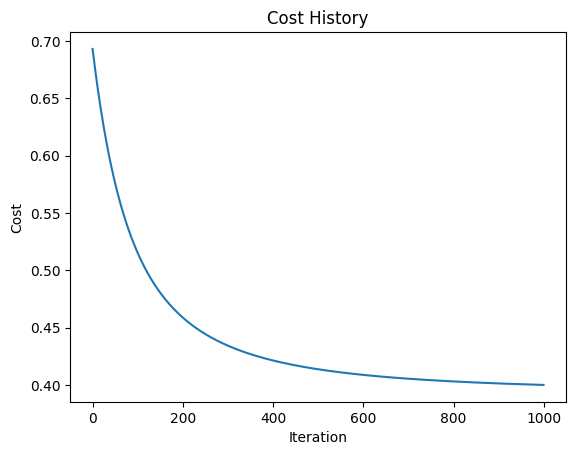

In [64]:
import matplotlib.pyplot as plt
# Plot the cost history
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost History')
plt.show()

## 2.5 Trustworthiness (10 Pts.)

 - We have seen above that for the given data, logistic regression performs reasonably well for the task of classifying email as spam or non-spam. We have an accuracy of 0.8 on the task.

 - Some advantages of the logistic regression model are:
    - It is simple and interpretable. The model allows a probabilistic interpretation of the results. 
    - The co-efficient values of the model shows the importance assigned to each feature. 
    - Moreover, the assumption of logistic regression, that the features are independent and do not interact, holds in this case.

 - Some disadvantages however are:
  -  that logistic regression assumes a linear decision boundary. This may result in the model underfitting the data since it cannot capture complex non-linear relationships. 
  - Also, in our case the data is imbalanced (1000 spam and 4000 non-spam). This can bias the predictions towards the majority class.
  - Moreover, we do not consider the actual text content of the emails, which could also contain a lot of information useful for classification.

- Possible remedies: 
  - Include the text content from the emails. We could then use various feature engineering methods word frequencies, n-grams, TF-IDF or word embeddings.
  - We could handle the class imbalance using techniques like oversampling or undersampling or algorithms like SMOTE.
  - We could use more sophisticated models like SVM to capture complex relationships.

## 2.6 TF-IDF

- TF-IDF stands for Term Frequency-Inverse Document Frequency. This is a value that signifies the importance of a term in a document from a collection of documents.

 - Term Frequency (TF): It is a measure of how frequently a term occurs in a particular document. It is calculated as a ratio of the number of times a term appears in a document to the total number of terms in the document.
 - Inverse Document Frequency (IDF): This measures the importance of the term in a collection of documents. i.e. it looks at how common a word is in a set of documents. It is calculated as the inverse value in how many documents the term occurs. So if the term is found in many documents then it has a lower IDF. 



# Task 3

This task expects the SMSSpamCollection to be present in the content directory at root level.

In [65]:
### For training
from sklearn.feature_extraction.text import TfidfVectorizer

### For Splitting Data
from sklearn.model_selection import train_test_split

### For linear regression and classification
from sklearn import linear_model
from sklearn.metrics import classification_report

### For using kNN Model
from sklearn.neighbors import KNeighborsClassifier

In [66]:
## Reading the data
sms_file = open('content/SMSSpamCollection', 'r')
all_sms = sms_file.readlines()

data = {'SMS': [], 'spam': []}

for sms in all_sms:
  sms_split = sms.split('\t')
  data['SMS'].append(' '.join(sms_split[1:]))
  data['spam'].append(0 if sms_split[0] == 'ham' else 1)


sms_df = pd.DataFrame.from_dict(data)
sms_df.head(10)

,SMS,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
5,FreeMsg Hey there darling it's been 3 week's n...,1
6,Even my brother is not like to speak with me. ...,0
7,As per your request 'Melle Melle (Oru Minnamin...,0
8,WINNER!! As a valued network customer you have...,1
9,Had your mobile 11 months or more? U R entitle...,1


In [67]:
## Preprocessing 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

punctuations = '!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~'
stop_words = stopwords.words('english')

### Removing Punctuation
preprocessed_data = sms_df.copy()
preprocessed_data['SMS'] = preprocessed_data['SMS'].apply(lambda x: 
                    ' '.join([word for word in x.split() 
                    if word not in (punctuations)]))


### Performining Lematization
lemmatizer = nltk.stem.WordNetLemmatizer()

preprocessed_data['SMS'] = preprocessed_data['SMS'].apply(lambda x: 
                     ' '.join([lemmatizer.lemmatize(word) 
                     for word in x.split()]))

### Trianing the model
x = TfidfVectorizer().fit_transform(preprocessed_data['SMS']).toarray()
y = preprocessed_data['spam'].tolist()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ruben\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ruben\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ruben\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [68]:
## Spliting data into test and training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [69]:
## Linear Regression
logistic_regression = linear_model.LogisticRegression()
logistic_regression.fit(x_train, y_train)

LogisticRegression()

In [70]:
## Get the logistic regression report
y_pred = logistic_regression.predict(x_test)

print(f'Accuracy: {round(logistic_regression.score(x_test, y_test) * 100, 2)}%')

print(classification_report(y_test, y_pred))

Accuracy: 97.13%
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [71]:
## Running kNN with k = 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

y_pred = logistic_regression.predict(x_test)

print(f'Accuracy: {round(knn.score(x_test, y_test) * 100, 2)}%')

print(classification_report(y_test, y_pred))

Accuracy: 91.93%
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

